In [3]:
# KNN Classification
from pandas import read_csv
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

p1 

data ----> tarin and test 



p2
CV :


data ---> tarin and test 





train_data-> data1,data2,data3,data4,data5


k=1

m1->data1,data2,data3,data4 :::: test-> data5 #91

m2->data1,data2,data3,data5 :::: test-> data4 #89

m3->data1,data2,data4,data5 :::: test-> data3 #80

m4->data1,data3,data4,data5 :::: test-> data2 #82

m5->data2,data3,data4,data5 :::: test-> data1 #87

overall =(91+89+80+82+87)/5




k=3

m1->data1,data2,data3,data4 :::: test-> data5 #91

m2->data1,data2,data3,data5 :::: test-> data4 #89

m3->data1,data2,data4,data5 :::: test-> data3 #80

m4->data1,data3,data4,data5 :::: test-> data2 #82

m5->data2,data3,data4,data5 :::: test-> data1 #87

overall =(91+89+80+82+87)/5




k=5

m1->data1,data2,data3,data4 :::: test-> data5 #91

m2->data1,data2,data3,data5 :::: test-> data4 #89

m3->data1,data2,data4,data5 :::: test-> data3 #80

m4->data1,data3,data4,data5 :::: test-> data2 #82

m5->data2,data3,data4,data5 :::: test-> data1 #87

overall =(91+89+80+82+87)/5


k=7

m1->data1,data2,data3,data4 :::: test-> data5 #91

m2->data1,data2,data3,data5 :::: test-> data4 #89

m3->data1,data2,data4,data5 :::: test-> data3 #80

m4->data1,data3,data4,data5 :::: test-> data2 #82

m5->data2,data3,data4,data5 :::: test-> data1 #87

overall =(91+89+80+82+87)/5



best k value is that one for which we get the best overall score and final model 
should be created for that value of k using entire training data 



In [4]:
from sklearn.datasets import load_diabetes
data=load_diabetes()
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [5]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 6209-B51F

 Directory of C:\Users\Meenal Patel\SOM_CLASS\SL Classification

01-12-2022  18:54    <DIR>          .
01-12-2022  18:54    <DIR>          ..
30-11-2022  10:13    <DIR>          .ipynb_checkpoints
30-11-2022  09:10            29,822 claimants (1).csv
01-12-2022  18:54            37,173 KNN_updated.ipynb
30-11-2022  10:13            67,867 Logistic Regression (1).ipynb
28-11-2022  10:21            23,279 pima-indians-diabetes.data (2).csv
               4 File(s)        158,141 bytes
               3 Dir(s)  72,630,386,688 bytes free


In [6]:
filename = 'pima-indians-diabetes.data (2).csv'
names = [
    'preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'
]
dataframe = read_csv(filename, names=names)
array = dataframe.values


X = array[:, 0:-1]
Y = array[:, -1]

In [7]:
dataframe

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [8]:
dataframe["class"].value_counts()

0    500
1    268
Name: class, dtype: int64

In [9]:
X=(X-X.min(axis=0))/(X.max(axis=0)-X.min(axis=0))

In [10]:
X

array([[0.35294118, 0.74371859, 0.59016393, ..., 0.50074516, 0.23441503,
        0.48333333],
       [0.05882353, 0.42713568, 0.54098361, ..., 0.39642325, 0.11656704,
        0.16666667],
       [0.47058824, 0.91959799, 0.52459016, ..., 0.34724292, 0.25362938,
        0.18333333],
       ...,
       [0.29411765, 0.6080402 , 0.59016393, ..., 0.390462  , 0.07130658,
        0.15      ],
       [0.05882353, 0.63316583, 0.49180328, ..., 0.4485842 , 0.11571307,
        0.43333333],
       [0.05882353, 0.46733668, 0.57377049, ..., 0.45305514, 0.10119556,
        0.03333333]])

In [11]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=19)

In [12]:
# for same random state value(in this case=19) randomness will be same for all the training and tesing data.

In [13]:
model = KNeighborsClassifier(n_neighbors=27)
model.fit(x_train,y_train)
pred=model.predict(x_test)
accuracy_score(y_test,pred)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.76      0.94      0.84       154
         1.0       0.76      0.42      0.54        77

    accuracy                           0.76       231
   macro avg       0.76      0.68      0.69       231
weighted avg       0.76      0.76      0.74       231



In [14]:
(2*(0.76*0.94))/(0.76+0.94)

0.8404705882352941

In [17]:
accuracy=[]
k_range=(i*2+1 for i in range(0,20))
for k in k_range:
    model = KNeighborsClassifier(n_neighbors=k)
    k_score=accuracy_score(y_test,pred)
    accuracy.append(k_score)
    
print(accuracy)

[0.7619047619047619, 0.7619047619047619, 0.7619047619047619, 0.7619047619047619, 0.7619047619047619, 0.7619047619047619, 0.7619047619047619, 0.7619047619047619, 0.7619047619047619, 0.7619047619047619, 0.7619047619047619, 0.7619047619047619, 0.7619047619047619, 0.7619047619047619, 0.7619047619047619, 0.7619047619047619, 0.7619047619047619, 0.7619047619047619, 0.7619047619047619, 0.7619047619047619]


In [13]:
# print(grid.best_score_)
# print(grid.best_params_ )

### Visualizing the CV results

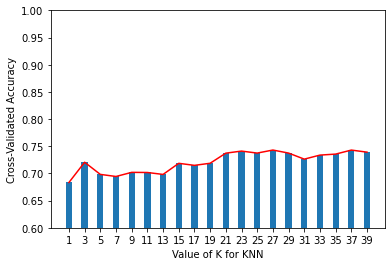

In [14]:
import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 1 to 39
k_range = [2*i+1 for i in range(0,20)]
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn,x_train , y_train, cv=10)
    k_scores.append(scores.mean())
# plot to see clearly
plt.bar(k_range, k_scores)
plt.plot(k_range, k_scores,color="red")

plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.xticks(k_range)
plt.ylim(0.6,1)
plt.show()

In [15]:
np.argmax(k_scores)

13

In [15]:
k_range[13]

27

In [18]:
1/(1+(exp**-10))

TypeError: unsupported operand type(s) for ** or pow(): 'numpy.ufunc' and 'int'